# 3. Práctica: Vectores a palabras

**Fecha de entrega: 16 de Marzo de 2025 @ 11:59pm**

Obtenga la matriz de co-ocurrencia para un corpus en español y realice los siguientes calculos:
- Las probabilidades conjuntas
$$p(w_i,w_j) = \frac{c_{i,j}}{\sum_i \sum_j c_{i,j}}$$
- Las probabilidades marginales
$$p(w_i) = \sum_j p(w_i,w_j)$$
- Positive Point Wise Mutual Information (PPMI):
$$PPMI(w_i,w_j) = \max\{0, \log_2 \frac{p(w_i,w_j)}{p(w_i)p(w_j)}\}$$

**Comparación de representaciones**

Aplica reducción de dimensionalidad (a 2D) de los vectores de la matríz con PPMI y de los vectores entrenados en español:

- Realiza un plot de 100 vectores aleatorios (que esten tanto en la matríz como en los vectores entrenados)
- Compara los resultados de los plots:
    - ¿Qué representación dirías que captura mejor relaciones semánticas?
    - Realiza un cuadro comparativo de ambos métodos con ventajas/desventajas

### 📁 [Carpeta con vectores](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=drive_link)

## Cargamos **liberías** que usaremos más adelante

In [ ]:
#Reiniciar la sesión después de correr esta celda"
#No es necesario volver a correr esta celda"
!pip install gensim

In [2]:
import numpy as np

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('cess_esp')
nltk.download('stopwords')
from nltk.corpus import cess_esp, stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from rich import print as rprint
from itertools import combinations, chain
import matplotlib.pyplot as plt

### Este es el tipo de **oraciones** que hay en la base de datos

In [4]:
# Exploración del corpus
rprint(len(cess_esp.sents()))
rprint(cess_esp.sents()[11])

6030

[
    'Respecto_al',
    'resultado',
    'de',
    'las',
    'elecciones',
    'autonómicas',
    ',',
    'Villalobos',
    'señaló',
    'que',
    '*0*',
    'demuestra',
    'que',
    '"',
    'Andalucía',
    'no',
    'es',
    'propiedad',
    'del',
    'PSOE',
    ',',
    '*0*',
    'es',
    'propiedad',
    'de',
    'los',
    'andaluces',
    '"',
    '.'
]

### Definiremos las mismas funciones vistas en clase para crear la matriz de **co-ocurrencias**.

In [5]:
def get_coocurrence_matrix(sentences: list[list[str]], indices: dict[str, int], n: int = 2) -> np.ndarray:
    matrix = np.zeros((len(indices), len(indices)))
    for sent in sentences:
        for term1, term2 in combinations(sent, 2):
            matrix[indices[term1], indices[term2]] += 1
            matrix[indices[term2], indices[term1]] += 1
    return matrix

In [6]:
def normalize_sent(sentence: list[str]) -> list[str]:
    stemmer = SnowballStemmer("spanish")
    result = []
    return [
        stemmer.stem(word.lower())
        for word in sentence
        if word.isalpha() and
        word.lower() not in stopwords.words("spanish")
    ]

def normalize_corpus(corpus: list[list[str]]) -> list[list[str]]:
    return [
        normalize_sent(sent)
        for sent in corpus
        if len(normalize_sent(sent)) > 1
    ]

### Se crean los elementos básicos para crear la matriz de co-ocurrencias

In [7]:
sentences = normalize_corpus(cess_esp.sents())

In [8]:
tokens = list(chain(*sentences))

In [9]:
freqs = Counter(tokens)
freqs.most_common(10)

[('hac', 361),
 ('hoy', 358),
 ('part', 358),
 ('dos', 313),
 ('pas', 297),
 ('años', 290),
 ('pais', 287),
 ('president', 274),
 ('pued', 269),
 ('si', 266)]

In [10]:
index = {token: idx for idx, token in enumerate(freqs.keys())}
vocabulario = list(index.keys())
vocabulario[0:10]

['grup',
 'estatal',
 'edf',
 'anunc',
 'hoy',
 'juev',
 'compr',
 'empres',
 'mexican',
 'eaa']

## Esta es la matriz de **Co-ocurrencias**

In [11]:
coocurrence_matrix = get_coocurrence_matrix(sentences, index)
coocurence_df = pd.DataFrame(data=coocurrence_matrix, index=list(index.keys()), columns=list(index.keys()))
coocurence_df

,grup,estatal,edf,anunc,hoy,juev,compr,empres,mexican,eaa,...,tenu,resbal,franj,desmoch,sillon,embut,levement,tacon,preced,azote
grup,6.0,1.0,1.0,2.0,7.0,3.0,4.0,9.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
estatal,1.0,0.0,1.0,2.0,6.0,1.0,1.0,6.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
edf,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anunc,2.0,2.0,1.0,0.0,11.0,2.0,2.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hoy,7.0,6.0,1.0,11.0,8.0,13.0,6.0,14.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
levement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
tacon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
preced,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Una pequeña vista de la forma en que se organiza la matriz de co-ocurrencias

In [12]:
query = SnowballStemmer("spanish").stem("presidencial")
coocurence_df[query].sort_values(ascending=False)

eleccion    7.0
candidat    7.0
hoy         6.0
rival       4.0
vot         4.0
           ... 
haid        0.0
boicote     0.0
golpe       0.0
ali         0.0
azote       0.0
Name: presidencial, Length: 9854, dtype: float64

## Calculemos las siguientes **probabilidades**

- **Las probabilidades conjuntas**
$$p(w_i,w_j) = \frac{c_{i,j}}{\sum_i \sum_j c_{i,j}}$$


In [13]:
PROBA_TOTAL = coocurence_df.sum().sum()
prob_conj = coocurence_df.copy()/Total
prob_conj

,grup,estatal,edf,anunc,hoy,juev,compr,empres,mexican,eaa,...,tenu,resbal,franj,desmoch,sillon,embut,levement,tacon,preced,azote
grup,4.843819e-06,8.073032e-07,8.073032e-07,1.614606e-06,5.651122e-06,2.421910e-06,3.229213e-06,7.265729e-06,8.073032e-07,8.073032e-07,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
estatal,8.073032e-07,0.000000e+00,8.073032e-07,1.614606e-06,4.843819e-06,8.073032e-07,8.073032e-07,4.843819e-06,1.614606e-06,8.073032e-07,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
edf,8.073032e-07,8.073032e-07,0.000000e+00,8.073032e-07,8.073032e-07,8.073032e-07,8.073032e-07,8.073032e-07,8.073032e-07,1.614606e-06,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
anunc,1.614606e-06,1.614606e-06,8.073032e-07,0.000000e+00,8.880335e-06,1.614606e-06,1.614606e-06,4.036516e-06,8.073032e-07,8.073032e-07,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hoy,5.651122e-06,4.843819e-06,8.073032e-07,8.880335e-06,6.458426e-06,1.049494e-05,4.843819e-06,1.130224e-05,4.843819e-06,8.073032e-07,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embut,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,8.073032e-07,0.000000e+00,8.073032e-07,0.000000e+00,0.000000e+00,0.000000e+00
levement,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,8.073032e-07,8.073032e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
tacon,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.073032e-07,8.073032e-07
preced,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.073032e-07,0.000000e+00,8.073032e-07


- **Las probabilidades marginales**
$$p(w_i) = \sum_j p(w_i,w_j)$$


In [14]:
prob_mut = prob_conj.sum(axis=1).copy()
prob_mut

grup        0.001292
estatal     0.000136
edf         0.000070
anunc       0.000495
hoy         0.004718
              ...   
embut       0.000021
levement    0.000021
tacon       0.000023
preced      0.000023
azote       0.000023
Length: 9854, dtype: float64

- **Positive Point Wise Mutual Information**
$$PPMI(w_i,w_j) = \max\{0, \log_2 \frac{p(w_i,w_j)}{p(w_i)p(w_j)}\}$$

In [15]:
mut_inf = np.log2(prob_conj/np.outer(prob_mut,prob_mut))
mut_inf[mut_inf < 0] = 0
mut_inf

C:\Users\footb\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


,grup,estatal,edf,anunc,hoy,juev,compr,empres,mexican,eaa,...,tenu,resbal,franj,desmoch,sillon,embut,levement,tacon,preced,azote
grup,1.535833,2.194749,3.152685,1.335885,0.000000,2.382929,2.014428,1.820841,0.425703,4.203311,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
estatal,2.194749,0.000000,6.396563,4.579763,2.911729,4.041845,3.258306,4.479757,4.669582,7.447189,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
edf,3.152685,6.396563,0.000000,4.537699,1.284702,4.999781,4.216242,2.852731,4.627518,9.405125,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
anunc,1.335885,4.579763,4.537699,0.000000,1.927334,3.182981,2.399442,2.357859,1.810718,5.588325,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hoy,0.000000,2.911729,1.284702,1.927334,0.000000,2.630424,0.731408,0.590288,1.142683,2.335328,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,10.839507,0.000000,10.839507,0.000000,0.000000,0.000000
levement,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,10.839507,10.839507,0.000000,0.000000,0.000000,0.000000
tacon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.524424,10.524424
preced,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,10.524424,0.000000,10.524424


## **Comparación de representaciones**

Aplica reducción de dimensionalidad (a 2D) de los vectores de la matríz con PPMI y de los vectores entrenados en español:

- Realiza un plot de 100 vectores aleatorios (que esten tanto en la matríz como en los vectores entrenados)
- Compara los resultados de los plots:
    - ¿Qué representación dirías que captura mejor relaciones semánticas?
    - Realiza un cuadro comparativo de ambos métodos con ventajas/desventajas

### 📁 [Carpeta con vectores](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=drive_link)

### A continuación entreno un modelo **CBOW** con la librería Word2Vec. Esto porque tuve problemas para recuperar los modelos vistos en clase. Este entrenamiento lo hice con las mismas oraciones que se usaron para calcular la matriz de co-ocurrencias.

In [16]:
# Train the CBOW model
N = 300
model_cbow = Word2Vec(sentences, vector_size=N, window=5, min_count=1, sg=0) # sg=0 for CBOW

# Create a list to store word vectors
word_vectors = []

# Iterate through the vocabulary and append the vectors to the list
for word in model_cbow.wv.index_to_key:
    word_vectors.append([word] + model_cbow.wv[word].tolist())

# Create a pandas DataFrame from the list of word vectors
cbow = pd.DataFrame(word_vectors, columns=["word"] + [f"dim_{i}" for i in range(N)])
cbow = cbow.set_index('word')

In [17]:
CBOW

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_290,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299
word,,,,,,,,,,,,,,,,,,,,,
hac,-0.128761,0.422277,0.005683,0.231691,0.130391,-0.506703,0.245906,0.919702,0.178941,-0.154858,...,0.049057,0.584310,0.487439,0.106855,0.544677,0.599815,0.147757,-0.350703,0.364030,-0.068714
hoy,-0.136678,0.443603,0.003991,0.234374,0.142053,-0.519595,0.252513,0.947588,0.189587,-0.160416,...,0.059006,0.605162,0.496174,0.111545,0.562675,0.619735,0.151469,-0.367339,0.374046,-0.071005
part,-0.118090,0.397292,0.003617,0.215906,0.126650,-0.474878,0.232472,0.865606,0.170033,-0.143879,...,0.047173,0.550550,0.458601,0.101995,0.515610,0.569344,0.138615,-0.329326,0.345126,-0.065153
dos,-0.127187,0.406896,0.000569,0.223752,0.129996,-0.490098,0.233673,0.889789,0.173383,-0.149395,...,0.053097,0.563689,0.465956,0.106893,0.527670,0.576298,0.138268,-0.340975,0.349099,-0.064577
pas,-0.137287,0.448410,0.008656,0.237999,0.144988,-0.532393,0.257514,0.976766,0.197024,-0.163451,...,0.058792,0.619154,0.518012,0.118860,0.574943,0.632768,0.155445,-0.369510,0.383165,-0.065431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bichit,-0.001678,0.002588,0.000935,0.004364,-0.002321,-0.002478,-0.000999,0.005501,-0.000451,-0.004169,...,-0.000412,0.006930,0.002669,0.002691,0.000684,0.002882,-0.000094,-0.002913,0.004490,-0.000933
parameci,-0.003125,0.003922,-0.002521,0.001196,-0.001888,-0.002267,-0.000101,0.010001,0.001868,-0.001601,...,-0.002623,0.008103,0.004806,0.001558,0.003207,0.004611,0.001194,-0.004241,0.002769,-0.003296
forr,0.000496,0.006102,-0.000341,0.001146,0.000764,-0.001405,0.004359,0.009147,0.001378,-0.001801,...,-0.002751,0.008184,0.006135,-0.001261,0.007031,0.005954,-0.001753,-0.003399,0.004921,-0.001802


## ¿Cómo **comparar** los **embeddings** de ambos modelos? Usando las primeras dos componentes de un análisis de **PCA** sobre las matrices de embeddings.

In [18]:
from sklearn.decomposition import PCA

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
def pca_graph(Comatrix1,Comatrix2,N,random_indices):

  '''
  Esta función genera un gráfico comparativo de la representación
  de embeddings de palabras en el Vocabulario mediante el uso
  de las dos primeras componentes de PCA.

  Parámetros:
  Comatrix 1 y 2: las que se van a coomparar sus embeddings
  N: El número de palabras que se van a comparar
  radom_indices: Son los indices aleatorios para seleccionar los embeddings

  Resultado:
  Un gráfico comparativo: los puntos en azul son de la comatrix1 y los rojos
  de la comatrix2
  '''

  pca = PCA(n_components=2)
  scaler = StandardScaler()

  transformed_matrix1 = pca.fit_transform(Comatrix1)
  random_elements1 = transformed_matrix1[random_indices, :]
  transformed_matrix2 = pca.fit_transform(Comatrix2)
  random_elements2 = transformed_matrix2[random_indices, :]

  normalized_elements1 = scaler.fit_transform(random_elements1)
  normalized_elements2 = scaler.fit_transform(random_elements2)

  #vocabulario_aux = [Vocabulario[i] for i in random_indices]

  plt.scatter(normalized_elements1[:, 0], normalized_elements1[:, 1],color='blue')
  #for i, word in enumerate(vocabulario):
   # plt.annotate(word, xy=(normalized_elements1[i, 0], normalized_elements1[i, 1]))

  plt.scatter(normalized_elements2[:, 0], normalized_elements2[:, 1]+6,color='red')
  #for i, word in enumerate(vocabulario):
    #plt.annotate(word, xy=(normalized_elements2[i, 0], normalized_elements2[i, 1]+6))

  plt.show()


In [21]:
N=100
random_indices = np.random.choice(len(Vocabulario), size=N, replace=False)

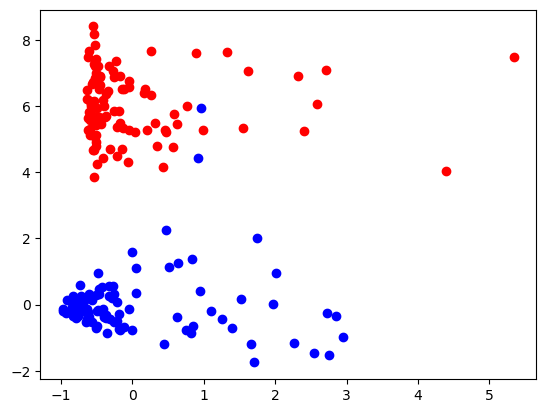

In [22]:
pca_graph(mut_inf,cbow,N,random_indices)

## **Reflexiones**

### Lo más importante que noté después de realizar varios experimentos fue que en general las representaciones de los vectores de CBOW tenían mayor variabilidad mientras que los de la matriz de co-ocurrencias no. Esto se traduce en que se podría calcular mejor ciertas métricas importantes como la similitud mejor en el modelo Cbow que en la matriz de co-ocurrencias.

### Sin embargo, puede que el hecho de que  las componentes estén en un espacio más reducido pueda estar ocultando información importante.

### Otro aspecto es que me da la impresión de que el Cbow tiene captura un poco mejor la riqueza o semajanzas y diferencias que existen en las palabras pues pareciera que genera más cumulos pequeños que la matriz de co-ocurrencias.